In [2]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por município desde 2014
dfBD = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv", sep= ";", encoding="latin1")
dfBD.head(2)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [3]:
######################################################################################
#Não precisa fazer isso, posso filtrar tudo num comando só, conforme o próximo comando
######################################################################################
##Filtro os dados da última década
#dfBDUltimaDecada = dfBD.loc[dfBD["ano"] >= 2015]
#dfBDUltimaDecada

In [5]:
#####################################################################################################
# Hoje, após sucessivas leis estaduais, e com a promulgação da Constituição do Estado do Rio de Janeiro em 1998
# , a RMRJ possui 22 municípios: Belford Roxo, Cachoeiras de Macacu, Duque de Caxias, Guapimirim, Itaboraí
# , Itaguaí, Japeri, Magé, Maricá, Mesquita, Nilópolis, Niterói, Nova Iguaçu, Paracambi, Petrópolis, Queimados
# , Rio Bonito, Rio de Janeiro, São Gonçalo, São João de Meriti, Seropédica e Tanguá
# FONTE: https://www.rj.gov.br/irm/formacao_rjrm
#####################################################################################################

#Cria um database somente com os dados da região Metropolitana
regMetropolitana = ["Rio de Janeiro", "Niterói", "Belford Roxo", "Cachoeiras de Macacu", "Duque de Caxias", "Guapimirim", "Itaboraí",
                    "Itaguaí", "Japeri", "Magé", "Maricá", "Mesquita", "Nilópolis", "Nova Iguaçu", "Paracambi", "Petrópolis",
                    "Queimados", "Rio Bonito", "Seropédica", "São Gonçalo", "São João de Meriti", "Tanguá"]

#dfBDRegMetropolitana = dfBDUltimaDecada.loc[dfBDUltimaDecada["fmun"].isin(regMetropolitana)]
#dfBDRegMetropolitana

#Filtra a base com os dados da região metropolitana e da última década
dfBDRegMetropolitana = dfBD.loc[(dfBD["fmun"].isin(regMetropolitana)) & (dfBD["ano"] >= 2015)]
dfBDRegMetropolitana

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
1112,3300456,Belford Roxo,2015,1,2015m01,Baixada Fluminense,20,0,1,21,...,0,0,148,15,0,0,0,0,1280,3
1116,3300803,Cachoeiras de Macacu,2015,1,2015m01,Interior,0,0,0,0,...,0,0,36,1,0,0,0,0,162,3
1128,3301702,Duque de Caxias,2015,1,2015m01,Baixada Fluminense,42,0,2,44,...,0,0,359,34,1,0,1,0,3291,3
1130,3301850,Guapimirim,2015,1,2015m01,Baixada Fluminense,2,0,0,2,...,0,0,36,2,1,0,0,0,180,3
1132,3301900,Itaboraí,2015,1,2015m01,Interior,6,0,0,6,...,0,0,89,7,0,0,0,0,799,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12856,3304557,Rio de Janeiro,2025,8,2025m08,Capital,86,2,2,90,...,326,68,2037,232,19,0,0,0,39553,2
12861,3304904,São Gonçalo,2025,8,2025m08,Grande Niterói,5,0,0,5,...,29,0,159,24,1,0,0,0,2463,2
12863,3305109,São João de Meriti,2025,8,2025m08,Baixada Fluminense,7,0,0,7,...,23,0,168,17,2,0,0,0,2040,2
12870,3305554,Seropédica,2025,8,2025m08,Baixada Fluminense,1,0,0,1,...,5,0,37,5,1,0,0,0,316,2


In [6]:
#Soma os valores da coluna (furto_veiculos) por municipio (fmun)
dfBDFurtoVeiculos = dfBDRegMetropolitana.groupby("fmun")["furto_veiculos"].sum().reset_index()
dfBDFurtoVeiculos

,fmun,furto_veiculos
0,Belford Roxo,4345
1,Cachoeiras de Macacu,247
2,Duque de Caxias,11318
3,Guapimirim,398
4,Itaboraí,2362
5,Itaguaí,1297
6,Japeri,524
7,Magé,2401
8,Maricá,2077
9,Mesquita,2441


In [7]:
#Cria o array com os dados do furto de veiculos
arrayFurtoVeiculos = np.array(dfBDFurtoVeiculos["furto_veiculos"])
arrayFurtoVeiculos

array([ 4345,   247, 11318,   398,  2362,  1297,   524,  2401,  2077,
        2441,  2106,  7247, 10082,   213,  1373,  1460,   940, 77126,
         632, 12185,  5715,   190])

In [8]:
#Cálculo da média, mediana e quartis dos furtos e roubos
mediaFurtoVeiculos = np.mean(arrayFurtoVeiculos)
medianaFurtoVeiculos = np.median(arrayFurtoVeiculos)
q1FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 25)
q2FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 50)
q3FurtoVeiculos = np.percentile(arrayFurtoVeiculos, 75)
distanciaFurtoVeiculos = (mediaFurtoVeiculos - medianaFurtoVeiculos) / medianaFurtoVeiculos
iqrFurtoVeiculos = q3FurtoVeiculos - q1FurtoVeiculos
limiteSuperiorFurtoVeiculos = q3FurtoVeiculos + (1.5 * iqrFurtoVeiculos)
limiteInferiorFurtoVeiculos = q1FurtoVeiculos - (1.5 * iqrFurtoVeiculos)

print(f'Média     = {mediaFurtoVeiculos:.2f}')
print(f'Mediana   = {medianaFurtoVeiculos:.2f}')
print(f'Q1        = {q1FurtoVeiculos:.2f}')
print(f'Q2        = {q2FurtoVeiculos:.2f}')
print(f'Q3        = {q3FurtoVeiculos:.2f}')
print(f'Distância = {distanciaFurtoVeiculos * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limiteSuperiorFurtoVeiculos:.2f}')
print(f'Lim. Inf. = {limiteInferiorFurtoVeiculos:.2f}')

Média     = 6667.23
Mediana   = 2091.50
Q1        = 709.00
Q2        = 2091.50
Q3        = 5372.50
Distância = 218.78 %
Lim. Sup. = 12367.75
Lim. Inf. = -6286.25


In [9]:
#Municípios que representam os OUTLIERS com MAIOR número de furtos de veículos
municipios_MaiorOutlier = dfBDFurtoVeiculos.loc[dfBDFurtoVeiculos["furto_veiculos"] >= limiteSuperiorFurtoVeiculos]
municipios_MaiorOutlier.sort_values(by="furto_veiculos")

,fmun,furto_veiculos
17,Rio de Janeiro,77126


In [9]:
##############################################################################################################
#RESPOSTA:
#Os municípios acima estão acima do limite superior e são considerados OUTLIERS em relação a furto de veículos
##############################################################################################################

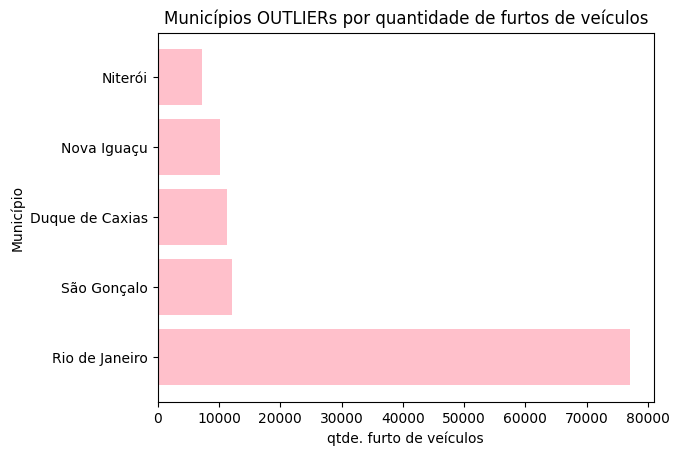

In [ ]:
#Ordeno pelo valor de venda antes de exibir no gráfico (Como só tinha 1 outlier, gero o gráfico com os 5 maiores)
dfBDFurtoVeiculos.sort_values(by="furto_veiculos", ascending=False, inplace=True)
dfBDFurtoVeiculosGrafico = dfBDFurtoVeiculos.head(5)

#OBS: Passo a coluna furto_veiculos para STRING para não aparecer no gráfco valores intermediários
#municipios_MaiorOutlier['furto_veiculos'] = municipios_MaiorOutlier['furto_veiculos'].astype(str)

#Gero o gráfico
plt.barh(dfBDFurtoVeiculosGrafico['fmun'], dfBDFurtoVeiculosGrafico['furto_veiculos'], color='pink')
plt.title('Municípios OUTLIERs por quantidade de furtos de veículos')
plt.xlabel('qtde. furto de veículos')
plt.ylabel('Município')
plt.grid(False)
plt.show()